# Recognizing hand-written digits
 * Orignial URL: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
 * Author: Gael Varoquaux (gael dot varoquaux at normalesup dot org)
 * License: BSD 3 clause
 * Dataflow Notebook Adaptation: Colin Brown, David Koop

In [13638070]:
# import matplotlib.pyplot as plt

# # Import datasets, classifiers and performance metrics
# from sklearn import datasets, svm, metrics

# Standard scientific Python imports
plt = import_module('matplotlib.pyplot')
datasets = import_module('sklearn.datasets')
svm = import_module('sklearn.svm')
metrics = import_module('sklearn.metrics')
plt, datasets, svm, metrics = plt, datasets, svm, metrics

<module 'matplotlib.pyplot' from '/Users/dkoop/Applications/anaconda/envs/jupyter-dfkernel/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<module 'sklearn.datasets' from '/Users/dkoop/Applications/anaconda/envs/jupyter-dfkernel/lib/python3.6/site-packages/sklearn/datasets/__init__.py'>

<module 'sklearn.svm' from '/Users/dkoop/Applications/anaconda/envs/jupyter-dfkernel/lib/python3.6/site-packages/sklearn/svm/__init__.py'>

<module 'sklearn.metrics' from '/Users/dkoop/Applications/anaconda/envs/jupyter-dfkernel/lib/python3.6/site-packages/sklearn/metrics/__init__.py'>

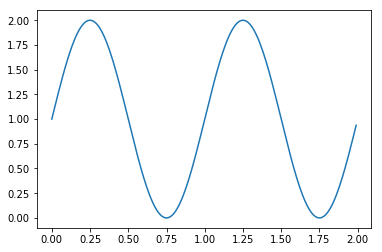

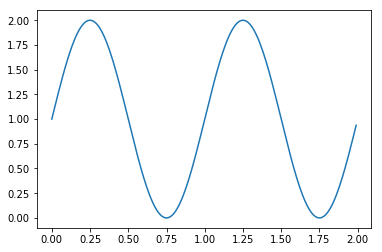

In [11669758]:
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)
plt.gcf()

In [14258757]:
# The digits dataset
%split_out datasets.load_digits()

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

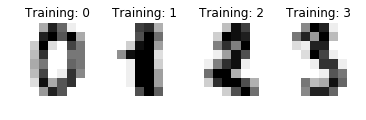

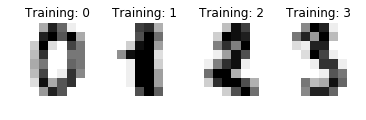

In [12757959]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
from itertools import islice
pairs = zip(images, target)

for index, (image, label) in enumerate(islice(pairs, 4)):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.gcf()

In [12073686]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix
n_samples = len(images)
X = images.reshape((n_samples, -1))
y = target

# manual test-train split (use model_selection.train_test_split)
%split_out {'X_train': X[:n_samples//2], 'X_test': X[n_samples//2:], \
 'y_train': y[:n_samples//2], 'y_test': y[n_samples//2:]}

In [12127061]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
svc = classifier.fit(X_train, y_train)

In [11969980]:
# Now predict the value of the digit on the second half:
expected,predicted = y_test, svc.predict(X_test)

In [14857695]:
# Classification report
print(metrics.classification_report(expected, predicted))

In [12672350]:
# Classification report with pandas formatting
pd = import_module('pandas')
prfs = metrics.precision_recall_fscore_support(expected, predicted)
pd.DataFrame.from_records(prfs)\
    .transpose()\
    .rename(columns={i: c for i,c in enumerate(['precision', 'recall', 'f1-score', 'support'])})

In [16735548]:
# Confusion matrix
metrics.confusion_matrix(expected, predicted)

In [12806126]:
from itertools import islice
pairs = zip(X_test, predicted)

for index, (image, prediction) in enumerate(islice(pairs,4)):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
fig2 = plt.gcf()